<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

In [3]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [4]:
connection = sqlite3.connect(r'data\chinook.db')
cursor = connection.cursor()

query = """
    SELECT genres.Name AS GenreName, AVG(tracks.Milliseconds) AS AvgSongLength
    FROM tracks
    JOIN genres ON tracks.GenreId = genres.GenreId
    GROUP BY genres.Name
    ORDER BY AvgSongLength DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(f"Genre: {row[0]}, Average Song Length (ms): {row[1]}")
    
connection.close()

Genre: Sci Fi & Fantasy, Average Song Length (ms): 2911783.0384615385
Genre: Science Fiction, Average Song Length (ms): 2625549.076923077
Genre: Drama, Average Song Length (ms): 2575283.78125
Genre: TV Shows, Average Song Length (ms): 2145041.0215053763
Genre: Comedy, Average Song Length (ms): 1585263.705882353
Genre: Metal, Average Song Length (ms): 309749.4438502674
Genre: Electronica/Dance, Average Song Length (ms): 302985.8
Genre: Heavy Metal, Average Song Length (ms): 297452.9285714286
Genre: Classical, Average Song Length (ms): 293867.5675675676
Genre: Jazz, Average Song Length (ms): 291755.3769230769
Genre: Rock, Average Song Length (ms): 283910.0431765613
Genre: Blues, Average Song Length (ms): 270359.77777777775
Genre: Alternative, Average Song Length (ms): 264058.525
Genre: Reggae, Average Song Length (ms): 247177.75862068965
Genre: Soundtrack, Average Song Length (ms): 244370.88372093023
Genre: Alternative & Punk, Average Song Length (ms): 234353.84939759035
Genre: Latin, Av

## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


### data ingestion (Data loading from different sources).

In [5]:
excel_df = pd.read_excel('data/chinook_data.xlsx')
csv_df = pd.read_csv('data/chinook_data.csv')
connection = sqlite3.connect('data/chinook.db')
cursor = connection.cursor()
query = """
SELECT 
t.name as Track,
t.composer,
t.unitprice,
g.name as Genre,
a.title as Album,
r.name as Artist
FROM tracks t
JOIN genres g ON t.genreid = g.genreid
JOIN albums a ON t.albumid = a.albumid
JOIN artists r ON a.artistid = r.artistid;
"""
sql_df = pd.read_sql(query, connection)
itunes_df = pd.concat([csv_df, excel_df, sql_df])
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492.0,211743651.0,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938.0,264168080.0,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


### Basic Exploratory Data Analysis (EDA).

In [6]:
itunes_df.shape

(4021, 8)

In [7]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  518 non-null    float64
 3   Bytes         518 non-null    float64
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(3), object(5)
memory usage: 282.7+ KB


In [8]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds    3503
Bytes           3503
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [9]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,5.180000e+02,5.180000e+02,4021.000000
mean,3.868336e+05,3.040734e+07,1.050184
std,5.258469e+05,9.602387e+07,0.237857
min,4.884000e+03,1.612660e+05,0.990000
25%,2.049758e+05,6.493416e+06,0.990000
50%,2.526950e+05,8.098298e+06,0.990000
75%,3.225330e+05,1.010645e+07,0.990000
max,2.935894e+06,5.701522e+08,1.990000


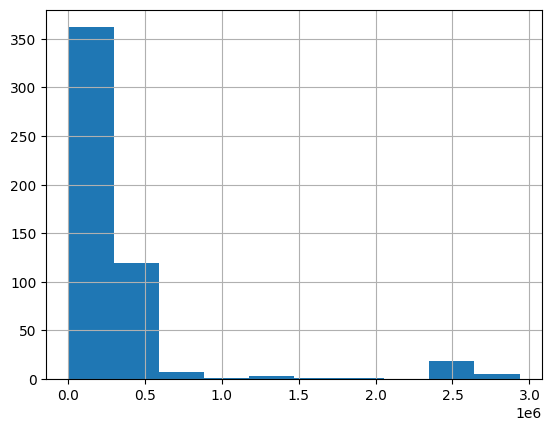

In [10]:
itunes_df["Milliseconds"].hist()
plt.show()

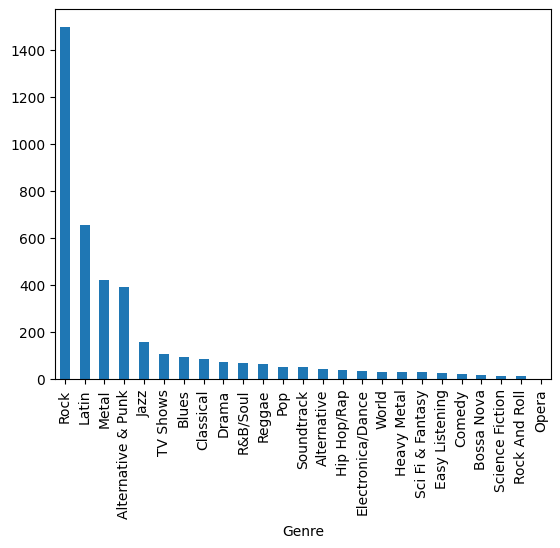

In [11]:
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

### Basic Data Cleaning Operations.

In [12]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'SciFi & Fantasy', 'Science Fiction', 'Comedy'])]
only_music.to_excel('output/only_music.xlsx')

In [13]:
itunes_df['Seconds'] = itunes_df['Milliseconds'] / 1000

In [14]:
def remove_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  upper_boundary = q3 + 1.5 * iqr
  lower_boundary = q1 - 1.5 * iqr
  new_df = df[column].clip(lower =lower_boundary, upper=upper_boundary)
  return new_df

itunes_df_clean = remove_outliers(itunes_df, 'Milliseconds')
itunes_df_clean.head()

0    498868.875
1    295444.000
2    155428.000
3    498868.875
4    231993.000
Name: Milliseconds, dtype: float64

In [15]:
itunes_df_clean.duplicated().sum()

np.int64(3577)

In [16]:
itunes_df_clean.drop_duplicates(inplace=True)
itunes_df_clean.duplicated().sum()

np.int64(0)

### save the cleaned dataset in an excel file 

In [17]:
itunes_df_clean.to_excel('output/cleaned_itunes.xlsx')

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 


In [18]:
import json

with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
btc_df_jsn.head()

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305


In [19]:
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', start='2020-11-28', end='2022-10-31', interval='1d')

btc_yf_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-11-28 00:00:00+00:00,17717.414062,17717.414062,17853.939453,16910.652344,17112.933594,32601040734
2020-11-29 00:00:00+00:00,18177.484375,18177.484375,18283.628906,17559.117188,17719.634766,31133957704
2020-11-30 00:00:00+00:00,19625.835938,19625.835938,19749.263672,18178.322266,18178.322266,47728480399
2020-12-01 00:00:00+00:00,18802.998047,18802.998047,19845.974609,18321.921875,19633.769531,49633658712
2020-12-02 00:00:00+00:00,19201.091797,19201.091797,19308.330078,18347.718750,18801.744141,37387697139


In [20]:
btc_df_jsn.rename(columns={'time': 'Date'}, inplace=True)
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')
btc_df_jsn.set_index('Date', inplace=True)


In [21]:
btc_df_jsn.head()


,symbol,open,close,high,low,volume
Date,,,,,,
2013-03-31,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305


In [22]:
btc_yf_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-11-28 00:00:00+00:00,17717.414062,17717.414062,17853.939453,16910.652344,17112.933594,32601040734
2020-11-29 00:00:00+00:00,18177.484375,18177.484375,18283.628906,17559.117188,17719.634766,31133957704
2020-11-30 00:00:00+00:00,19625.835938,19625.835938,19749.263672,18178.322266,18178.322266,47728480399
2020-12-01 00:00:00+00:00,18802.998047,18802.998047,19845.974609,18321.921875,19633.769531,49633658712
2020-12-02 00:00:00+00:00,19201.091797,19201.091797,19308.330078,18347.718750,18801.744141,37387697139


### Concatenate the DataFrames

In [23]:
btc_combined_df = pd.concat([btc_df_jsn, btc_yf_df])
btc_combined_df.head()

,symbol,open,close,high,low,volume,"(Adj Close, BTC-USD)","(Close, BTC-USD)","(High, BTC-USD)","(Low, BTC-USD)","(Open, BTC-USD)","(Volume, BTC-USD)"
Date,,,,,,,,,,,,
2013-03-31 00:00:00,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01 00:00:00,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02 00:00:00,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03 00:00:00,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04 00:00:00,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\ASUS\OneDrive\Bureau\1Sem-2CS-IASD resources\SEDS\SEDS_Lab5\myenv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
c:\Users\ASUS\OneDrive\Bureau\1Sem-2CS-IASD resources\SEDS\SEDS_Lab5\myenv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
c:\Users\ASUS\OneDrive\Bureau\1Sem-2CS-IASD resources\SEDS\SEDS_Lab5\myenv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
c:\Users\ASUS\OneDrive\Bureau\1Sem-2CS-IASD resources\SEDS\SEDS_Lab5\myenv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
c:\Users\ASUS\OneDrive\Bureau\1Sem-2CS-IASD resources\SEDS\SEDS_Lab5\mye

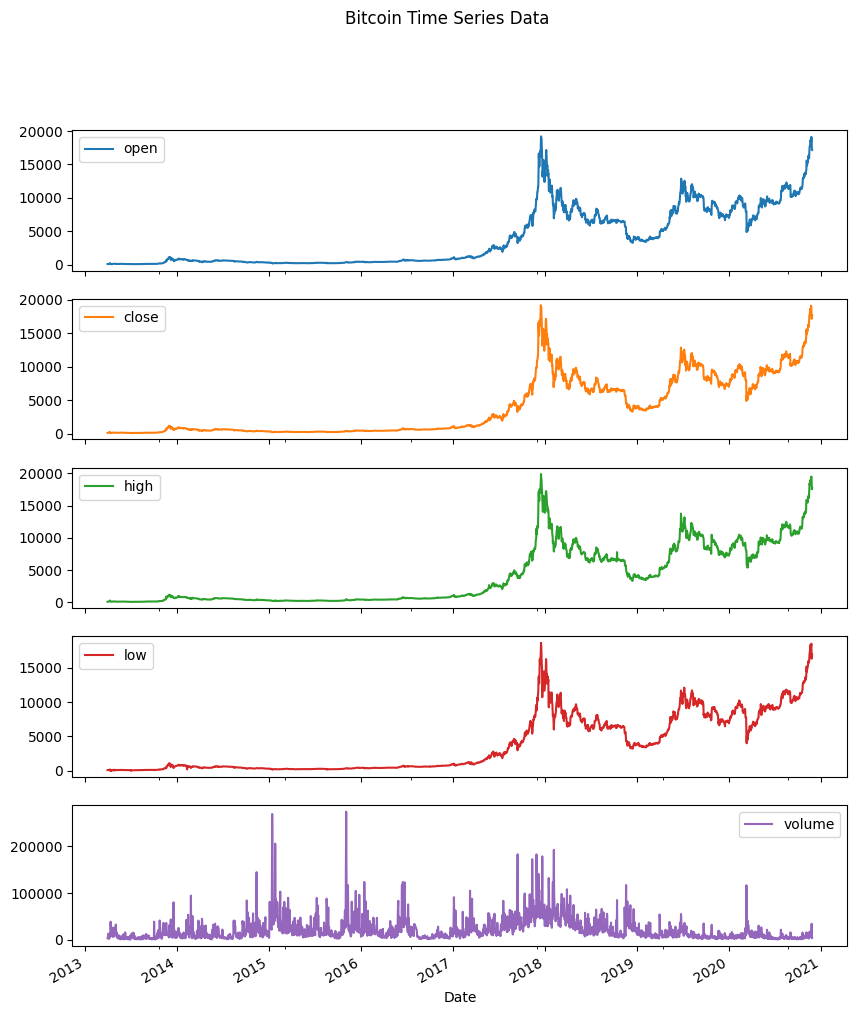

In [24]:
btc_combined_df[['open', 'close', 'high', 'low', 'volume']].plot(subplots=True, figsize=(10, 12), title="Bitcoin Time Series Data")
plt.show()

In [25]:
correlation_matrix = btc_combined_df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)


                          open     close      high       low    volume  \
open                  1.000000  0.998120  0.999020  0.998306  0.057938   
close                 0.998120  1.000000  0.999100  0.998944  0.054514   
high                  0.999020  0.999100  1.000000  0.997788  0.070796   
low                   0.998306  0.998944  0.997788  1.000000  0.035311   
volume                0.057938  0.054514  0.070796  0.035311  1.000000   
(Adj Close, BTC-USD)       NaN       NaN       NaN       NaN       NaN   
(Close, BTC-USD)           NaN       NaN       NaN       NaN       NaN   
(High, BTC-USD)            NaN       NaN       NaN       NaN       NaN   
(Low, BTC-USD)             NaN       NaN       NaN       NaN       NaN   
(Open, BTC-USD)            NaN       NaN       NaN       NaN       NaN   
(Volume, BTC-USD)          NaN       NaN       NaN       NaN       NaN   

                      (Adj Close, BTC-USD)  (Close, BTC-USD)  (High, BTC-USD)  \
open                          

In [26]:
btc_combined_df.isna().sum()

symbol                   702
open                     702
close                    702
high                     702
low                      702
volume                   702
(Adj Close, BTC-USD)    2793
(Close, BTC-USD)        2793
(High, BTC-USD)         2793
(Low, BTC-USD)          2793
(Open, BTC-USD)         2793
(Volume, BTC-USD)       2793
dtype: int64

In [30]:
btc_combined_df['symbol'].fillna(btc_combined_df['symbol'].value_counts().index[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6316\1160490180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  btc_combined_df['symbol'].fillna(btc_combined_df['symbol'].value_counts().index[0], inplace=True)


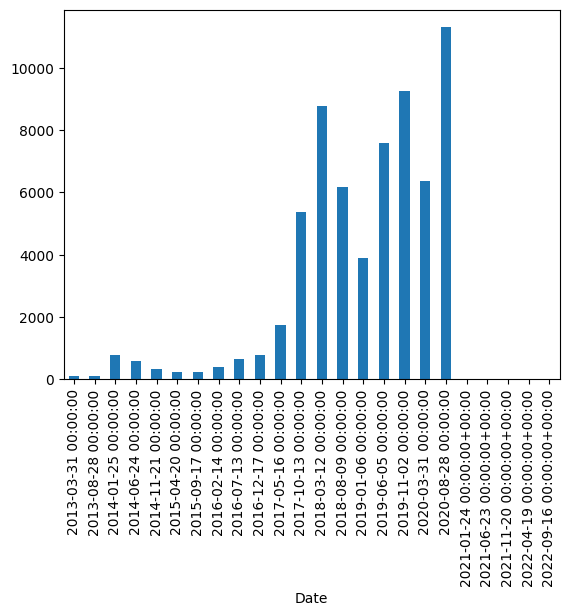

In [29]:
btc_combined_df['low'][::150].plot.bar()
plt.show()


`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.

    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
	
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
         btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
        set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             